In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
housing=pd.read_csv("housing_prices.csv")
print(housing.shape)
housing.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Exploratory Analysis

#### Univariate

C:\Users\venka\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea'>

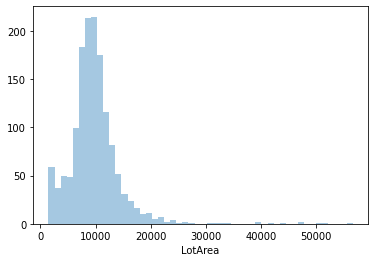

In [14]:
#Analyse the spread of the "LotArea" column
sns.distplot(housing["LotArea"], kde=False)

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

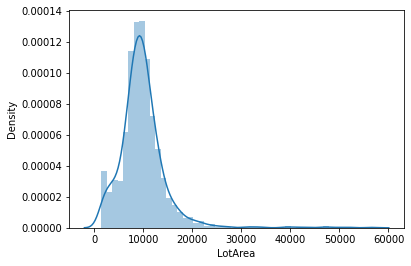

In [15]:
sns.distplot(housing["LotArea"], kde=True)

[Text(0, 0, 'VinylSd'),
 Text(1, 0, 'Wd Sdng'),
 Text(2, 0, 'HdBoard'),
 Text(3, 0, 'Plywood'),
 Text(4, 0, 'MetalSd'),
 Text(5, 0, 'CemntBd'),
 Text(6, 0, 'WdShing'),
 Text(7, 0, 'BrkFace'),
 Text(8, 0, 'AsbShng'),
 Text(9, 0, 'BrkComm'),
 Text(10, 0, 'Stucco'),
 Text(11, 0, 'AsphShn'),
 Text(12, 0, 'CBlock')]

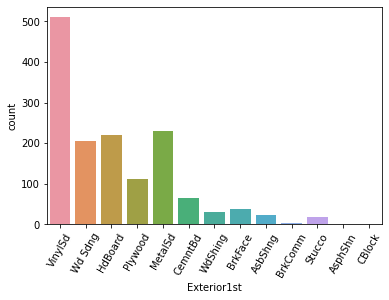

In [18]:
# What are different types of housing exteriors
plot=sns.countplot(x="Exterior1st", data=housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)

### Bi-variate Analysis 

#### Q.Does the price of the house depend on the lot area? 

In [22]:
#sns.regplot(x="LotArea", y="SaleCondition", data=housing)
#housing["LotArea"].quantile[0.5, 0.95, 0.99]
#sns.regplot(x="LotArea", y="SalePrice", data=housing_sub)

### Plotting multiple graphs 

#### Q.Analyze the realtionship between SalePrice and all Square Feet reated columns

In [7]:
sf_cols=[col_name for col_name in housing.columns if "SF" in col_name]

In [18]:
len(sf_cols)
sf_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


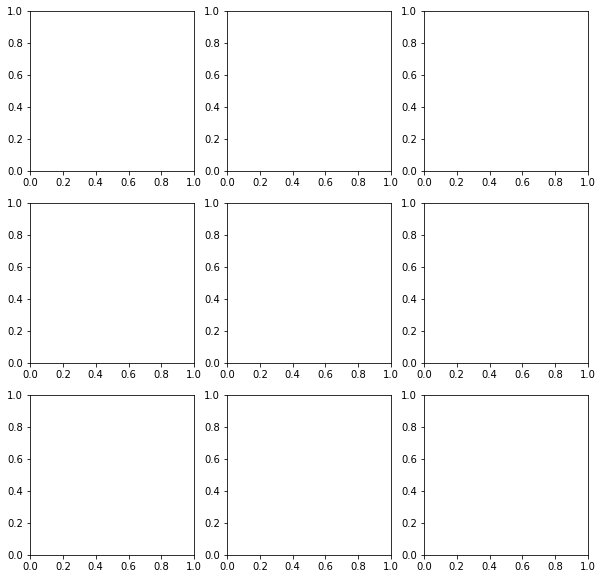

In [20]:
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i in range(0, len(sf_cols)):
    rows=i//3
    cols=i%3
    print(rows,cols)

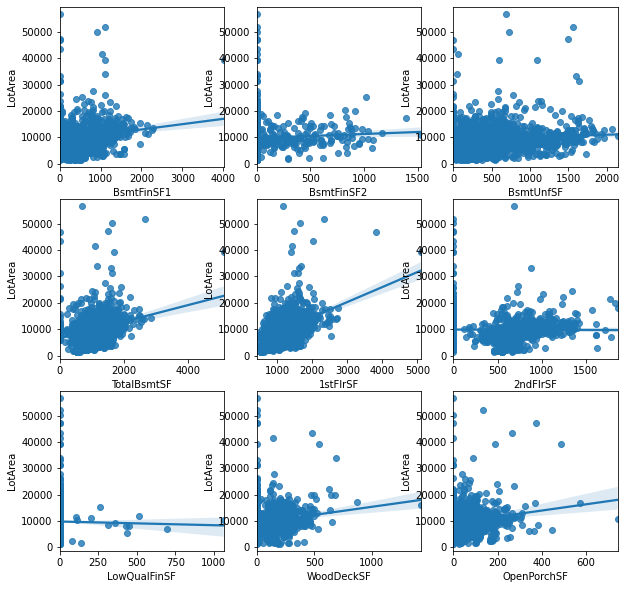

In [22]:
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i in range(0, len(sf_cols)):
    rows=i//3
    cols=i%3
    ax=axs[rows, cols]
    plot=sns.regplot(x=sf_cols[i], y="LotArea", data=housing, ax=ax)

[Text(0, 0, 'VinylSd'),
 Text(1, 0, 'Wd Sdng'),
 Text(2, 0, 'HdBoard'),
 Text(3, 0, 'Plywood'),
 Text(4, 0, 'MetalSd'),
 Text(5, 0, 'CemntBd'),
 Text(6, 0, 'WdShing'),
 Text(7, 0, 'BrkFace'),
 Text(8, 0, 'AsbShng'),
 Text(9, 0, 'BrkComm'),
 Text(10, 0, 'Stucco'),
 Text(11, 0, 'AsphShn'),
 Text(12, 0, 'CBlock')]

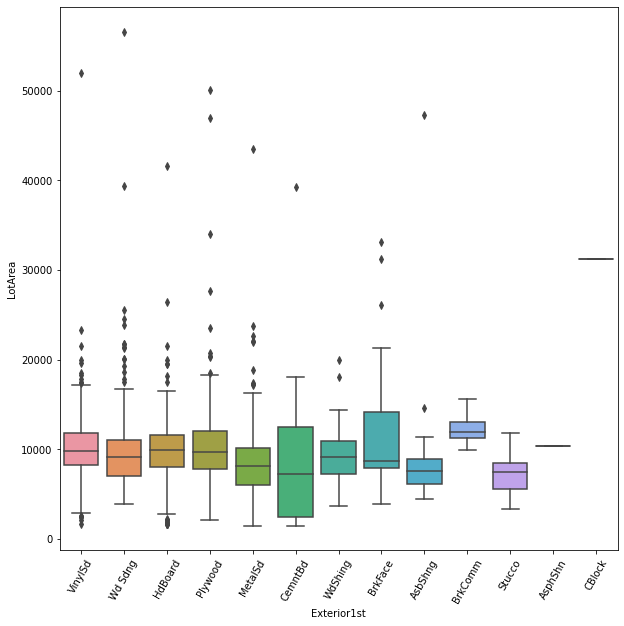

In [29]:
fig, axs=plt.subplots(figsize=(10, 10))
plot=sns.boxplot(x="Exterior1st", y="LotArea", data=housing, ax=axs)
plot.set_xticklabels(plot.get_xticklabels(), rotation=60)